References:
- [Wikipedia article about Nelder-Mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)
- [Adaptive Nelder-Mead](https://www.researchgate.net/profile/Lixing-Han-2/publication/225691623_Implementing_the_Nelder-Mead_simplex_algorithm_with_adaptive_parameters/links/0c9605346dd8f07dd3000000/Implementing-the-Nelder-Mead-simplex-algorithm-with-adaptive-parameters.pdf)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [4]:
xs = np.linspace(-6, 6, 100)
ys = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(xs, ys)

f = himmelblau(X, Y)

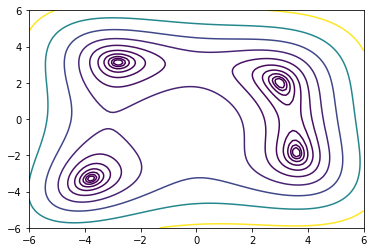

In [5]:
plt.contour(X, Y, f, levels=np.logspace(0, 3, num=10))

In [6]:
simplex = np.array(
    [[0, 0],
     [-2, -2],
     [-2, 1]]
)

In [7]:
def plot_with_simplex(X, Y, f, simplex, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    
    ax.contour(X, Y, f, levels=np.logspace(0, 3, num=10))
    s = plt.Polygon(simplex, fill=False, ec="red", lw=2)
    ax.add_patch(s)
    
    return ax

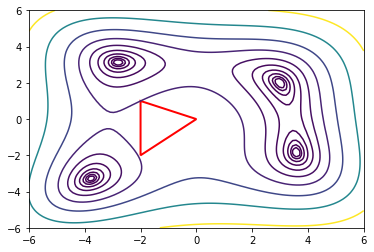

In [8]:
plot_with_simplex(X, Y, f, simplex)

## Simple implementation

In [9]:
def step_nm(f, simplex, alpha=1, beta=2, gamma=1/2, delta=1/2):
    """ Naive, but interpretable implementation of one step in the Nelder-Mead algorithm.
    """
    simplex = np.asarray(simplex, dtype=float)
    
    # Sort vertices in ascending order
    fvals = f(simplex[:, 0], simplex[:, 1])
    idxs = np.argsort(fvals)
    fvals = fvals[idxs]
    simplex = simplex[idxs]
    old_simplex = simplex.copy()

    # Centroid of first n vertices (all but the last one)
    centroid = np.mean(simplex[:-1], axis=0)
    
    # Reflection
    xr = (1 + alpha)*centroid - alpha*simplex[-1]
    fr = f(*xr)
    if fvals[0] <= fr < fvals[-2]:
        simplex[-1] = xr
        return old_simplex, simplex, "reflection"
    
    # Expansion
    if fr < fvals[0]:
        xe = centroid + beta*(xr - centroid)
        fe = f(*xe)
        if fe < fr:
            simplex[-1] = xe
        else:
            simplex[-1] = xr
        return old_simplex, simplex, "expansion"
    
    # Contraction
    if fvals[-2] <= fr:
        if fr < fvals[-1]:  # Outside
            xoc = centroid + gamma*(xr - centroid)
            foc = f(*xoc)
            if foc <= fr:
                simplex[-1] = xoc
                return old_simplex, simplex, "outside contraction"
            
        else:  # Inside
            xic = centroid - gamma*(centroid - simplex[-1])
            fic = f(*xic)
            if fic < fvals[-1]:
                simplex[-1] = xic
                return old_simplex, simplex, "inside contraction"
    
    # Shrink
    simplex = simplex[0] + delta*(simplex - simplex[0])
    return old_simplex, simplex, "shrink"

In [10]:
simplex = np.array(
    [[0, 0],
     [-2, -2],
     [-2, 1]]
)

In [11]:
_, simplex, operation = step_nm(himmelblau, simplex)

In [12]:
print(operation)

outside contraction


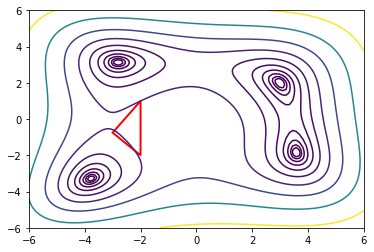

In [13]:
plot_with_simplex(X, Y, f, simplex)

expansion


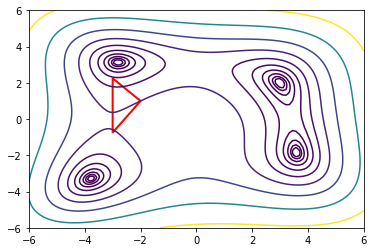

In [14]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


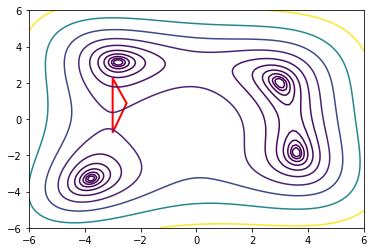

In [15]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

reflection


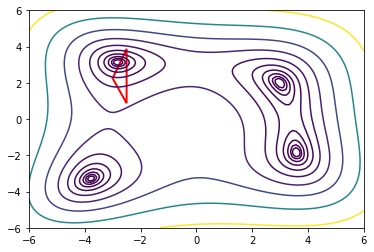

In [16]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


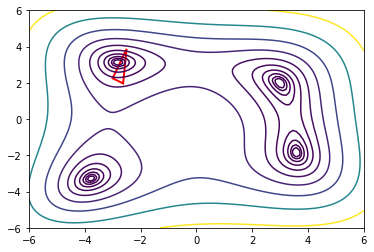

In [17]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


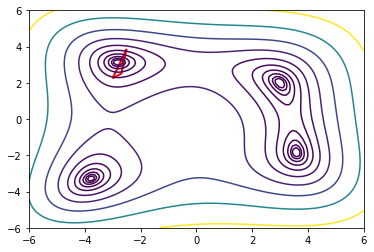

In [18]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


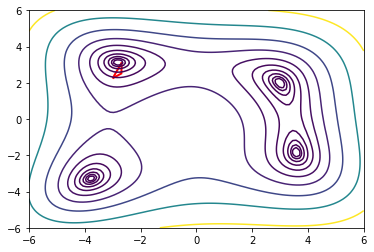

In [19]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

reflection


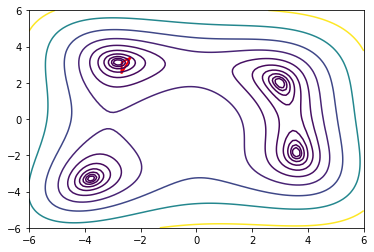

In [20]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


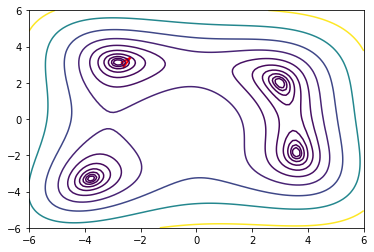

In [21]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


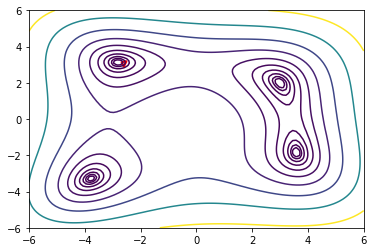

In [22]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

inside contraction


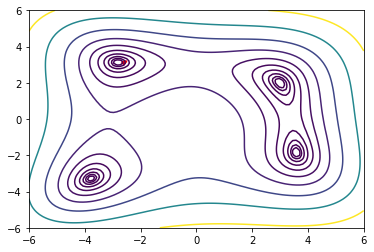

In [23]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

reflection


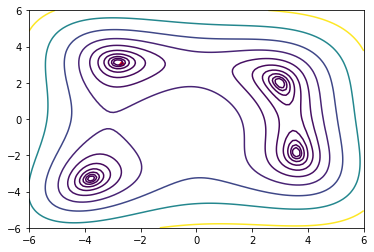

In [24]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

expansion


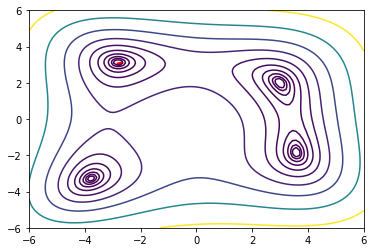

In [25]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

reflection


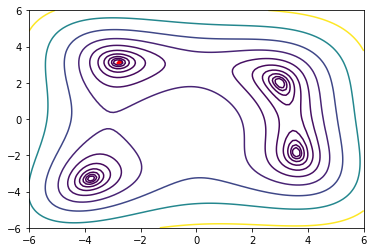

In [26]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

reflection


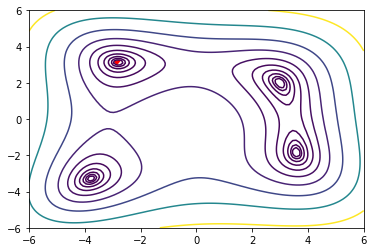

In [27]:
_, simplex, operation = step_nm(himmelblau, simplex)
print(operation)

plot_with_simplex(X, Y, f, simplex)

## Animation

In [38]:
# From https://stackoverflow.com/questions/19270673/matplotlib-radius-in-polygon-edges-is-it-possible

from matplotlib import patches, path, pyplot as plt

class RoundedPolygon(patches.PathPatch):
    def __init__(self, xy, pad, **kwargs):
        p = path.Path(*self.__round(xy=xy, pad=pad))
        super().__init__(path=p, **kwargs)

    def __round(self, xy, pad):
        n = len(xy)

        for i in range(0, n):

            x0, x1, x2 = np.atleast_1d(xy[i - 1], xy[i], xy[(i + 1) % n])

            d01, d12 = x1 - x0, x2 - x1
            d01, d12 = d01 / np.linalg.norm(d01), d12 / np.linalg.norm(d12)

            x00 = x0 + pad * d01
            x01 = x1 - pad * d01
            x10 = x1 + pad * d12
            x11 = x2 - pad * d12

            if i == 0:
                verts = [x00, x01, x1, x10]
            else:
                verts += [x01, x1, x10]
        codes = [path.Path.MOVETO] + n*[path.Path.LINETO, path.Path.CURVE3, path.Path.CURVE3]

        return np.atleast_1d(verts, codes)


In [28]:
simplex = np.array(
    [[0, 0],
     [-2, -2],
     [-2, 1]]
)

data = []
for _ in range(15):
    old, simplex, kind = step_nm(himmelblau, simplex)
    data.append((old, simplex, kind))

In [29]:
from celluloid import Camera

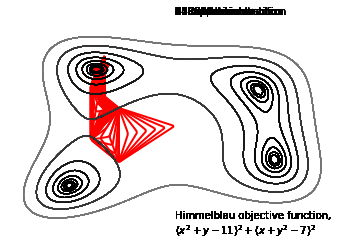

In [40]:
fig, ax = plt.subplots()
ax.set_axis_off()

camera = Camera(fig)

description = "Himmelblau objective function, \n$(x^2 + y - 11)^2 + (x + y^2 - 7)^2$"

for n, (old_simplex, new_simplex, transition) in enumerate(data, start=1):
    for t in np.linspace(0, 1.0, 10):
        interp = (1 - t)*old_simplex + t*new_simplex
        
        ax.contour(X, Y, f, levels=np.logspace(0, 3, num=10)[:-1], cmap="gray", linewidths=1)
        s = RoundedPolygon(interp, pad=0.1, fill=False, ec="red", lw=2)
        ax.add_patch(s)
        ax.text(0.5, 1.01, f"{n}. {transition.capitalize()}", transform=ax.transAxes)
        ax.text(0.5, 0., description, transform=ax.transAxes)
        
        #animate_one(old_simplex, new_simplex, transition, t)
        camera.snap()


In [41]:
animation = camera.animate()

In [42]:
from IPython.display import HTML
HTML(animation.to_html5_video())

In [43]:
animation.save("nelder-mead.mp4", dpi=200)

## Colophon

In [ ]:
!pip freeze